In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import torch
from equitorch.nn._cutoff import *

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
x = torch.rand(20,50)
# x = torch.rand(1000)

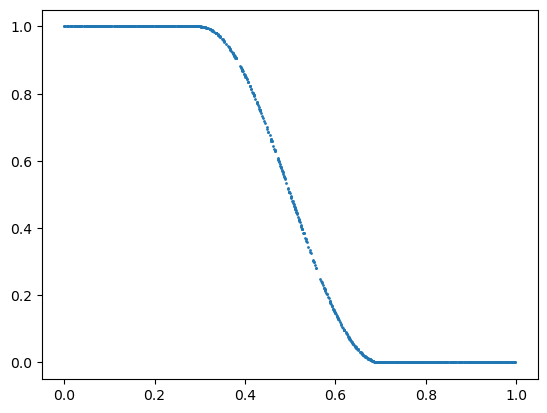

In [5]:
cosine = CosineCutoff(0.7, 0.3)
y_c = cosine(x)
plt.scatter(y=y_c, x=x, s=1)

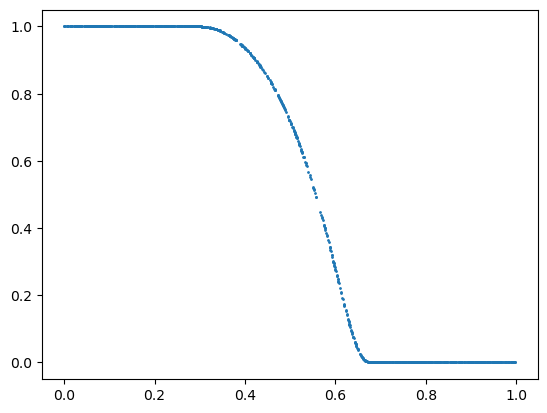

In [6]:
mollifier = MollifierCutoff(0.7,0.3)
y_m = mollifier(x)
plt.scatter(y=y_m, x=x, s=1)

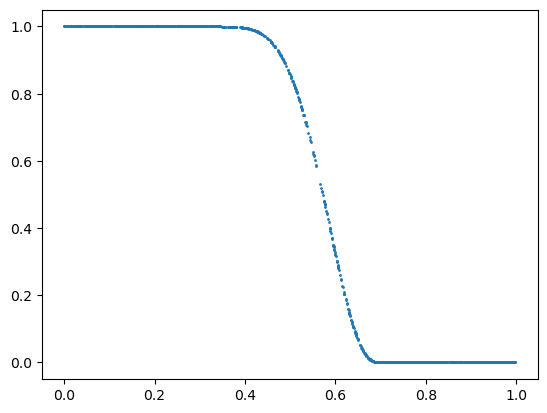

In [7]:
polynomial = PolynomialCutoff(0.7, 0.3)
y_p = polynomial(x)
plt.scatter(y=y_p, x=x, s=1)

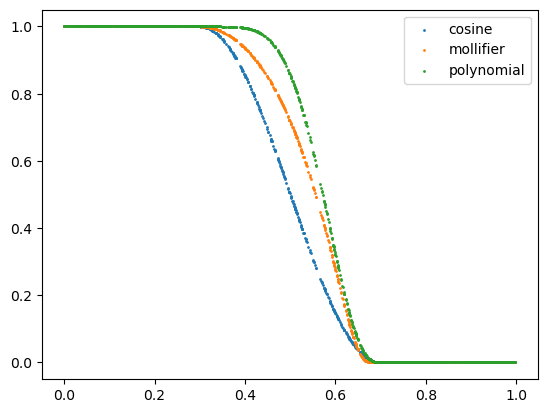

In [10]:
plt.scatter(y=y_c, x=x, s=1, label='cosine')
plt.scatter(y=y_m, x=x, s=1, label='mollifier')
plt.scatter(y=y_p, x=x, s=1, label='polynomial')
plt.legend()
plt.show()

In [14]:
from equitorch.math._o3 import _generate_spherical_harmonics

In [15]:
_generate_spherical_harmonics(17)

x = X.narrow(dim,0,1)
y = X.narrow(dim,1,1)
z = X.narrow(dim,2,1)

sh_0_0 = torch.ones_like(x)
if lmax == 0:
    return torch.cat([
        sh_0_0,
    ], dim=dim)

sh_1_0 = math.sqrt(3)*y
sh_1_1 = math.sqrt(3)*z
sh_1_2 = math.sqrt(3)*x
if lmax == 1:
    return torch.cat([
        sh_0_0,
        sh_1_0, sh_1_1, sh_1_2
    ], dim=dim)

sh_2_0 = (1/2)*math.sqrt(5)*(sh_1_0*x + sh_1_2*y)
sh_2_1 = (1/2)*math.sqrt(5)*(sh_1_0*z + sh_1_1*y)
sh_2_2 = (1/6)*math.sqrt(15)*(-sh_1_0*y + 2*sh_1_1*z - sh_1_2*x)
sh_2_3 = (1/2)*math.sqrt(5)*(sh_1_1*x + sh_1_2*z)
sh_2_4 = (1/2)*math.sqrt(5)*(-sh_1_0*y + sh_1_2*x)
if lmax == 2:
    return torch.cat([
        sh_0_0,
        sh_1_0, sh_1_1, sh_1_2,
        sh_2_0, sh_2_1, sh_2_2, sh_2_3, sh_2_4
    ], dim=dim)

sh_3_0 = (1/6)*math.sqrt(42)*(sh_2_0*x + sh_2_4*y)
sh_3_1 = (1/3)*math.sqrt(7)*(sh_2_0*z + sh_2_1*x + sh_2_3*y)
sh_3_2 = -1/30*math.sqrt(70)*sh_2_0*x + (2/15)*math.sqrt(70)*sh_2_1*z + (1/15)*math.sqrt(210)*sh_2_2*y + (1/30)*math.sqrt(70)*sh_2_4*y
